# Thera Bank Personal Loan Campaign

# Objective
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

# 1. Load Libraries and data

## 1.1 Import Libraries

In [1]:
%matplotlib inline 
import seaborn as sns 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 

## 1.2 Load Data

In [90]:
bank_data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## 1.3 The target parameter, or the dependent parameter (y) is:
Personal Loan: Did this customer accept the personal loan offered in the last campaign?

## 1.4 The following is a list of possible independent variables (x):

•ID: Customer ID

•Age: Customer's age in completed years

•Experience: #years of professional experience

•Income: Annual income of the customer ($000)

•ZIP Code: Home Address ZIP code.

•Family: Family size of the customer

•CCAvg: Avg. spending on credit cards per month ($000)

•Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

•Mortgage: Value of house mortgage if any. ($000)

•Personal Loan: Did this customer accept the personal loan offered in the last campaign?

•Securities Account: Does the customer have a securities account with the bank?

•CD Account: Does the customer have a certificate of deposit (CD) account with the bank?

•Online: Does the customer use internet banking facilities?

•Credit card: Does the customer use a credit card issued by the bank?


## 1.5 Summary of the dataset
The dataset has 5000 rows and 14 columns. None of the data in the variables has missing data.

In [4]:
bank_data.shape # Let us explore the shape of the data

(5000, 14)

In [5]:
bank_data.describe() # statistical summary of the data. We found a negative -3 value on "Experience" dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
bank_data.info() # check number of columns, null values and datatype of the datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## 1.6 Check for missing data
There is no missing data in the dataset.

In [7]:
bank_data.isnull().values.any() # Check any missing value, and we found out that there is none

False

 ## 1.7 Data imputation
 There are some data of the dataset with negative values. Data imputation is required to remove the negative values and replace them with estimated values.

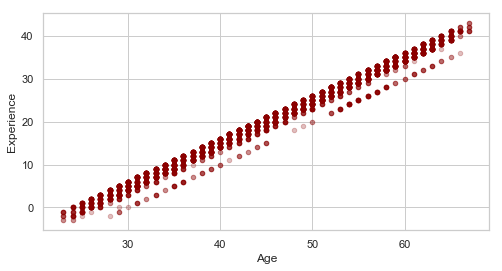

In [371]:
bank_data['Experience'] = bank_data['Experience'].astype(int)
bank_data.plot.scatter(y='Experience',x='Age',color='darkred',alpha=0.25,figsize=(8,4))

It is apparent from figure above that customers who are below certain age may register negative experience. Therefore, we could convert customers with negative experience to zero experience because of their young age.

In [18]:
remove_negative_age = lambda x : 0 if x < 0 else x
bank_data['Experience'] = bank_data['Experience'].apply(remove_negative_age)

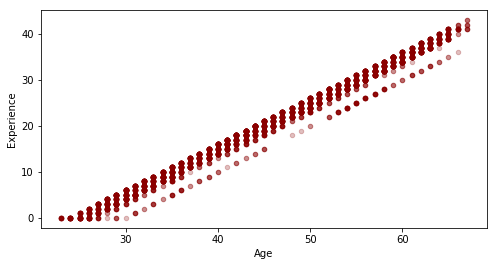

In [19]:
bank_data['Experience'] = bank_data['Experience'].astype(int)
bank_data.plot.scatter(y='Experience',x='Age',color='darkred',alpha=0.25,figsize=(8,4))

As the result, all data of experience with negative values are replaced with zero values.

# 2. Distribution of Dataset

## 2.1 Understand unique values

In [372]:
list_of_unique_values = ([ print(f'Number of unique values for {column} is {len(bank_data[column].unique())}')  for column in bank_data.columns])

Number of unique values for ID is 5000
Number of unique values for Age is 45
Number of unique values for Experience is 47
Number of unique values for Income is 162
Number of unique values for ZIP Code is 467
Number of unique values for Family is 4
Number of unique values for CCAvg is 108
Number of unique values for Education is 3
Number of unique values for Mortgage is 347
Number of unique values for Personal Loan is 2
Number of unique values for Securities Account is 2
Number of unique values for CD Account is 2
Number of unique values for Online is 2
Number of unique values for CreditCard is 2


## 2.2 Number of people with zero mortgage

In [23]:
cus_with_zero_mortgage = bank_data[bank_data["Mortgage"]<=0.0].shape[0]
percentage_of_zero_mortgage = round(cus_with_zero_mortgage/bank_data.shape[0]*100, 2)
print(f'Number of customers with zero mortgage is {cus_with_zero_mortgage}, a {percentage_of_zero_mortgage}% of the overall customer population')

Number of customers with zero mortgage is 3462, a 69.24% of the overall customer population


## 2.3 Number of people with zero credit card spending per month
Two attributes are used for the calculation of credit card spending. 
"CreditCard" is used to determined whether a person owns a credit card. 
"CCAvg" is used to determined a person spending on credit card.

In [374]:
credit_card_and_zero_spending = bank_data[(bank_data["CreditCard"]>=1.0) & (bank_data["CCAvg"]<=0.0)]
number_of_credit_card_holders = bank_data[(bank_data["CreditCard"]>=1.0)].shape[0]
print(f'Number of people own a credit card but spend zero is {credit_card_and_zero_spending.shape[0]}, compared to total credit card holders of {number_of_credit_card_holders}')

Number of people own a credit card but spend zero is 28, compared to total credit card holders of 1470


In [375]:
print(f'{credit_card_and_zero_spending.head()}')

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
215    216   38          14      92     95818       2    0.0          1   
260    261   51          27      58     92407       1    0.0          1   
444    445   64          40      91     93106       2    0.0          3   
1073  1074   33           8     122     94583       1    0.0          1   
1098  1099   46          20     114     90720       1    0.0          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
215        249              0                   0           0       1   
260          0              0                   0           0       0   
444          0              0                   0           0       1   
1073         0              0                   0           0       1   
1098         0              0                   0           0       1   

      CreditCard  
215            1  
260            1  
444            1  
1073           1  
1098           

# 3. Study the data distribution in each attribute

## 3.1 Value counts of all categorical columns
- Number of unique values for ID is 5000
- Number of unique values for Age is 45
- Number of unique values for Experience is 47
- Number of unique values for Income is 162
- Number of unique values for ZIP Code is 467
- Number of unique values for Family is 4
- Number of unique values for CCAvg is 108
- Number of unique values for Education is 3
- Number of unique values for Mortgage is 347
- Number of unique values for Personal Loan is 2
- Number of unique values for Securities Account is 2
- Number of unique values for CD Account is 2
- Number of unique values for Online is 2
- Number of unique values for CreditCard is 2

We group the attributes based on number of unique values. Personal Loan, Securities Account, CD Accoun, Online and CreditCard have two unique values. 

In [27]:
pd.Series.value_counts(bank_data["Personal Loan"])

0    4520
1     480
Name: Personal Loan, dtype: int64

In [25]:
def generate_categorical_values(df_data, attributes):
    
    for header in attributes:
        df_data[header] = df_data[header].astype('category') 

    return df_data[attributes]

categorical_bank_data = generate_categorical_values(bank_data, ["Personal Loan", "Securities Account", "CD Account", "Online", "CreditCard"]).apply(pd.Series.value_counts)

In [26]:
generate_percentage_count = lambda x : pd.Series.value_counts(x)
generate_categorical_values(bank_data, ["Personal Loan", "Securities Account", "CD Account", "Online", "CreditCard"]).apply(generate_percentage_count)

,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,4520,4478,4698,2016,3530
1,480,522,302,2984,1470


In [379]:
generate_categorical_values(bank_data, ['Family']).apply(pd.Series.value_counts)

,Family
1,1472
2,1296
4,1222
3,1010


In [29]:
generate_categorical_values(bank_data, ['Education']).apply(pd.Series.value_counts)

,Education
1,2096
3,1501
2,1403


## 3.2 Percentage of value counts of all categorical columns

In [31]:
print("Percentage of value counts of all Family column :")
percentage = lambda x : str(round(x*100,2)) + " %"
bank_data["Family"].value_counts(normalize=True).apply(percentage)

Percentage of value counts of all Family column :


1    29.44 %
2    25.92 %
4    24.44 %
3     20.2 %
Name: Family, dtype: object

In [32]:
generate_percentage_count = lambda x : pd.Series.value_counts(x)/x.shape[0]*100
print("Percentage of value counts of all categorical columns :")
generate_categorical_values(bank_data, ["Personal Loan", "Securities Account", "CD Account", "Online", "CreditCard"]).apply(generate_percentage_count)

Percentage of value counts of all categorical columns :


,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,90.4,89.56,93.96,40.32,70.6
1,9.6,10.44,6.04,59.68,29.4


# 3.3 Univariate Analysis
we will analyze attributes with integer or float variables. These variables are Age, Experience, Income, CCAvg and Mortgage.

### 3.3.1 For Age attribute
The figure below shows that the age of customers is almost evenly distributed from 28 to 64. 

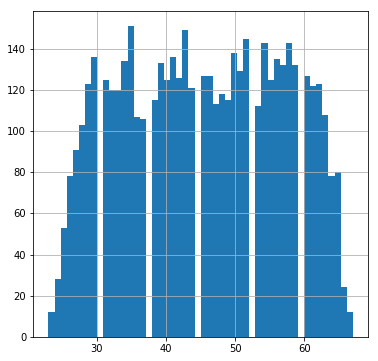

In [33]:
bank_data['Age'].hist(stacked=False, bins=50, figsize=(6,6)) 

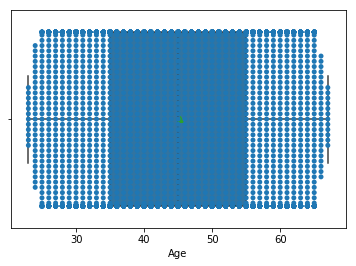

In [34]:
#sns.set(style="whitegrid")
ax = sns.boxplot(x=bank_data['Age'], showmeans=True)
ax = sns.swarmplot(x=bank_data['Age'])

### 3.3.2 For Experience attribute
The figure below shows that the experience of customers is almost evenly distributed from 5 to 40 years.

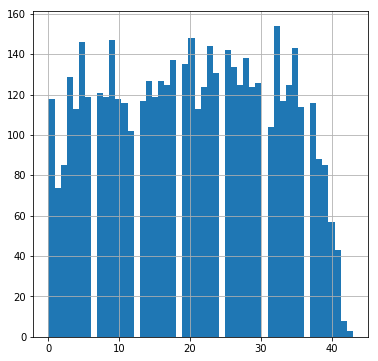

In [35]:
bank_data['Experience'].hist(stacked=False, bins=50, figsize=(6,6)) 

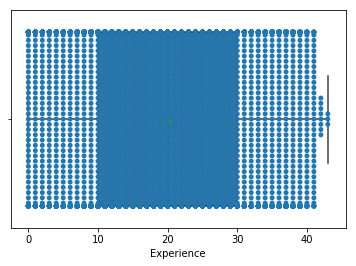

In [36]:
ax = sns.boxplot(x=bank_data['Experience'], showmeans=True)
ax = sns.swarmplot(x=bank_data['Experience'])

### 3.3.3 For CCAvg attribute
The figure below shows that the majority of customers spend 3,000 per month. Mean spending is 1.938k, and median spending is 1.5k

Mean spending is 1.938k, and median spending is 1.5k


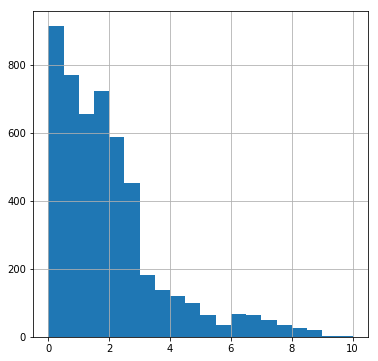

In [49]:
print(f'Mean spending is {round(np.mean(bank_data["CCAvg"]), 3)}k, and median spending is {round(np.median(bank_data["CCAvg"]), 3)}k')
bank_data['CCAvg'].hist(stacked=False, bins=20, figsize=(6,6)) 

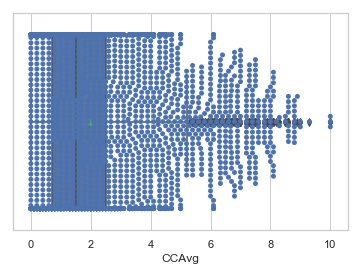

In [249]:
ax = sns.boxplot(x=bank_data['CCAvg'], showmeans=True)
ax = sns.swarmplot(x=bank_data['CCAvg'])

### 3.3.4 For CCAvg attribute
The figure below shows that the most customers earn less than $100k per year.

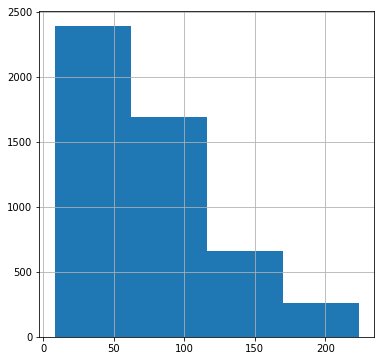

In [84]:
bank_data['Income'].hist(stacked=False, bins=4, figsize=(6,6)) 

# 3.4 Bivariate Analysis

### 3.4.1 Pair Plot
The figure below shows interesting correlation between experience and age, and income.

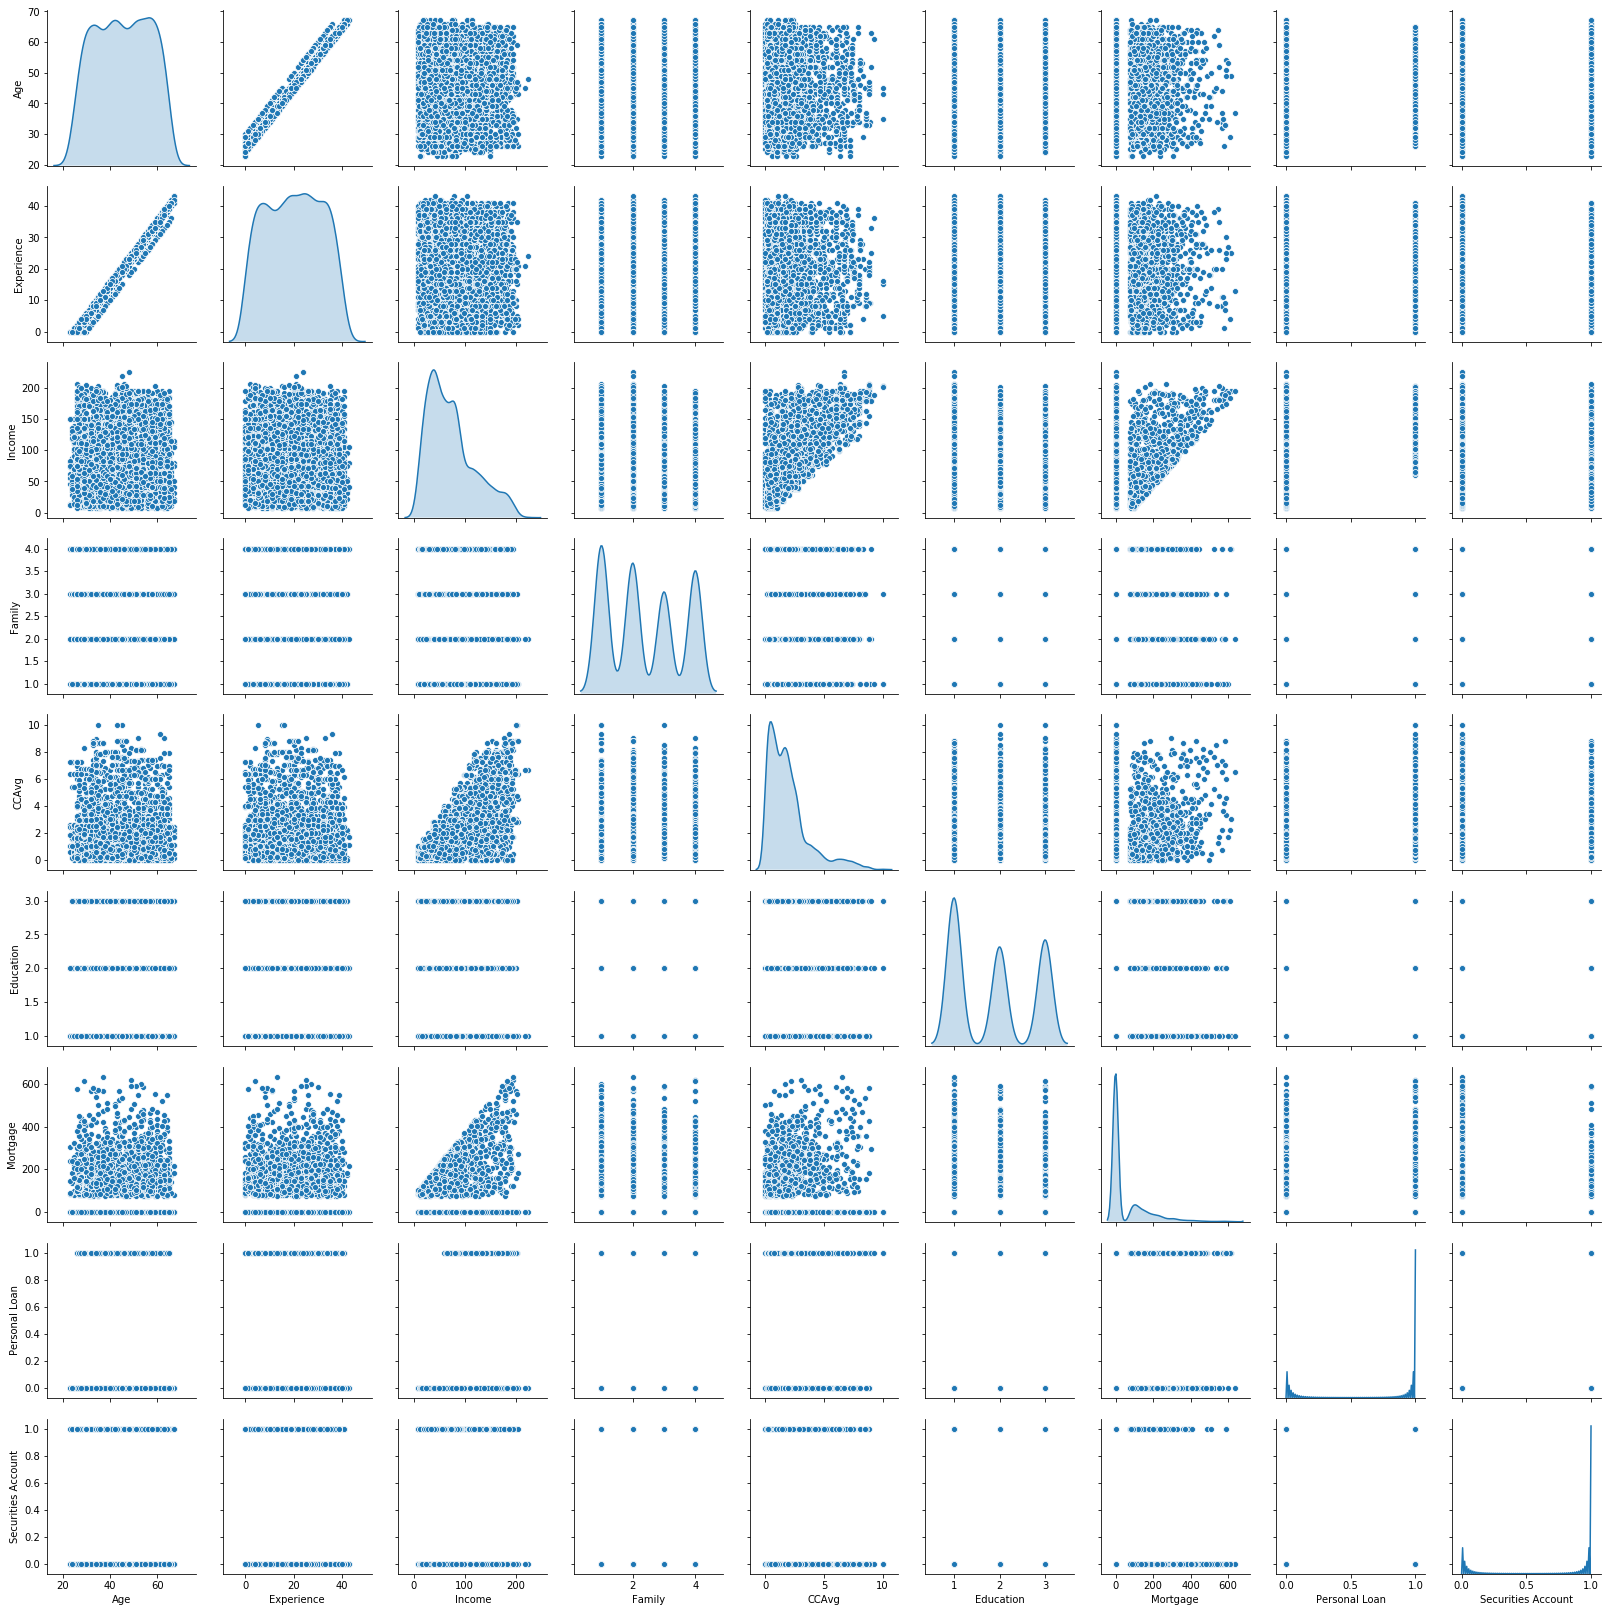

In [51]:
sns.pairplot(bank_data[['Age','Experience','Income','Family','CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account']], diag_kind='kde')

Figure below shows that there is a income cutoff point for credit card spending and mortgage.

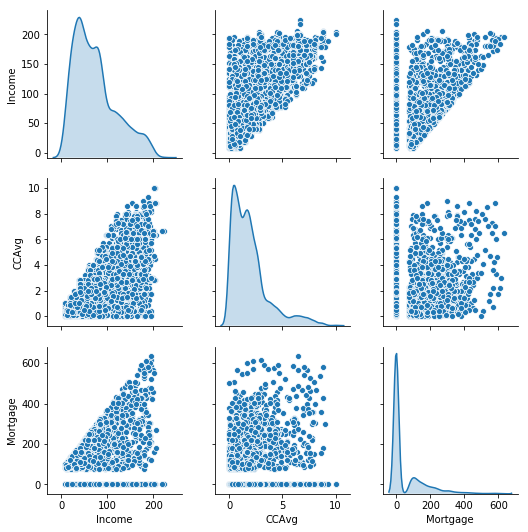

In [55]:
sns.pairplot(bank_data[['Income','CCAvg', 'Mortgage']], diag_kind='kde')

## 3.5 Check the average of attributes of the credit card holders
Figure below shows that the average income of customers with personal loan is more than double the customers without personal loan.

In [300]:
average = lambda x : np.mean(x)
pd.pivot_table(bank_data[['CreditCard', 'Personal Loan', 'Age', 'Experience', 'Income', "Securities Account", "CD Account"]], index=['CreditCard', 'Personal Loan'],aggfunc=average)

Age  Experience      Income
CreditCard Personal Loan                                   
0          0              45.325399   20.084247   66.391168
           1              44.866469   19.602374  144.468843
1          0              45.467973   20.247928   65.867370
           1              45.538462   20.412587  145.398601

Figure below shows that the average income of customers with personal loan is much higher. However, there are some customers with high incomes but without personal loan.

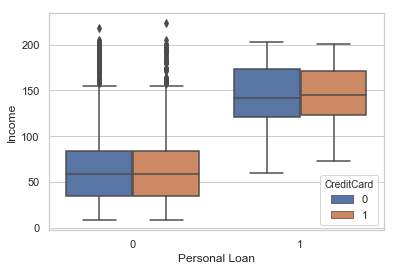

In [346]:
sns.boxplot(x='Personal Loan',y='Income',hue='CreditCard',data=bank_data)

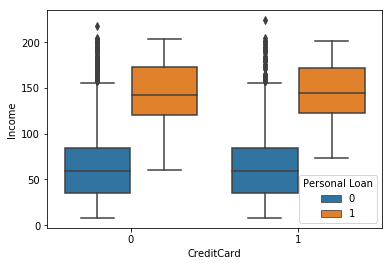

In [57]:
sns.boxplot(x='CreditCard',y='Income',hue='Personal Loan',data=bank_data)

Figure below shows that customers with personal loan are less than 9% of the total customer population.

In [59]:
row_count = bank_data.shape[0]
count = lambda x : np.size(x)/row_count*100
count_table = pd.pivot_table(bank_data[['CreditCard', 'Personal Loan', 'Age', 'Experience', 'Income', "Securities Account", "CD Account"]], index=['CreditCard', 'Personal Loan'],aggfunc=count)
print(count_table)

                            Age  Experience  Income
CreditCard Personal Loan                           
0          0              63.86       63.86   63.86
           1               6.74        6.74    6.74
1          0              26.54       26.54   26.54
           1               2.86        2.86    2.86


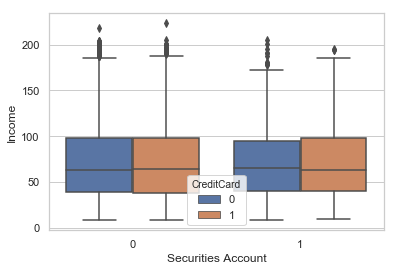

In [347]:
sns.boxplot(x='Securities Account',y='Income',hue='CreditCard',data=bank_data)

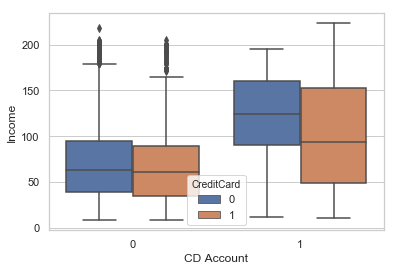

In [348]:
sns.boxplot(x='CD Account',y='Income',hue='CreditCard',data=bank_data)

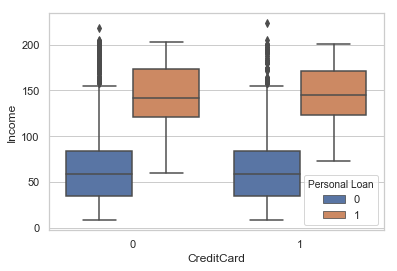

In [349]:
sns.boxplot(x='CreditCard',y='Income',hue='Personal Loan',data=bank_data)

In [356]:
sum_up = lambda x : np.sum(x)
pd.pivot_table(bank_data[['CreditCard', 'Personal Loan', 'Age', 'Experience', 'Income', "Securities Account", "CD Account"]], index=['CreditCard', 'Personal Loan'],aggfunc=sum_up)

Age  Experience  Income
CreditCard Personal Loan                            
0          0              144724       64129  211987
           1               15120        6606   48686
1          0               60336       26869   87406
           1                6512        2919   20792

In [360]:
row_count = bank_data.shape[0]
count = lambda x : np.sum(x)/np.size(x)
pd.pivot_table(bank_data[['CreditCard', 'Personal Loan', 'Age', 'Experience', 'Income', "Securities Account", "CD Account"]], index=['CreditCard', 'Personal Loan'],aggfunc=count)

Age  Experience      Income
CreditCard Personal Loan                                   
0          0              45.325399   20.084247   66.391168
           1              44.866469   19.602374  144.468843
1          0              45.467973   20.247928   65.867370
           1              45.538462   20.412587  145.398601

# 4. Train the data

In [67]:
bank_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

Split the data into training and test set in the ratio of 70:30 respectively. Use Logistic Regression model to predict the likelihood of a customer buying personal loans.

In [74]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score

omitted_attributes = ["ID", "Personal Loan", "ZIP Code"]
    
X = bank_data.drop(omitted_attributes, axis=1)     # Predictor feature columns (8 X m)
    
# Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)
Y = bank_data['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

#print(X.head())

# Split the data into training and test set in the ratio of 70:30 respectively
C = [1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

model_performance = []

for i in C:
    # Fit the model on train data
    model = LogisticRegression(
            random_state=2,
            penalty='l1', 
            solver='liblinear', 
            class_weight='balanced', 
            C=i)  # changing values of C
    
    model.fit(x_train, y_train)
    
    # predict on test data
    y_predict = model.predict(x_test)  
    test_recall = round(recall_score(y_test, y_predict),3)
    test_precision = round(precision_score(y_test, y_predict),3)
    
    # predict on train data    
    y_predict = model.predict(x_train)     
    train_recall = round(recall_score(y_train, y_predict),3)
    train_precision = round(precision_score(y_train, y_predict),3)
    
    model_performance.append({'C':i, 'test_recall':  test_recall, 'test_precision': test_precision, 'train_recall':  train_recall, 'train_precision': train_precision})
        
performance_df = pd.DataFrame.from_dict(model_performance)
print(performance_df)

   C  test_precision  test_recall  train_precision  train_recall
0  1            0.53        0.879             0.51         0.909


We are looking to predict potential customers who have potential to sign up personal loan. Therefore, we want to find the maximum recall number for the model so that it captures as many potential personal customers as possible. 

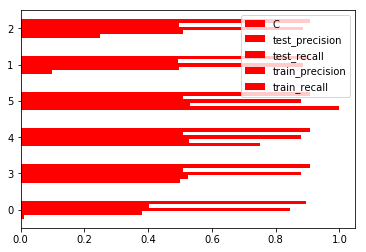

In [70]:
performance_df.sort_values('test_recall', axis=0, ascending=True).plot(kind='barh', color='r', )

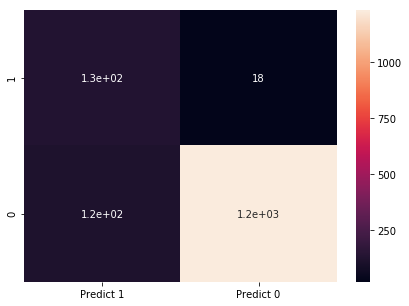

In [71]:
model = LogisticRegression(
random_state=42,
penalty='l1', 
solver='liblinear', 
class_weight='balanced', 
C=0.75)  # changing values of C
    
model.fit(x_train, y_train)
    
# predict on test data
y_predict = model.predict(x_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

# 5. Improve the model
There are few methods that we can apply to improve the performance of model.

## 5.1 Run a program with a range of C values.

In [75]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score

omitted_attributes = ["ID", "Personal Loan", "ZIP Code"]
    
X = bank_data.drop(omitted_attributes, axis=1)     # Predictor feature columns (8 X m)
    
# Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)
Y = bank_data['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

print(X.head())

# Split the data into training and test set in the ratio of 70:30 respectively
C = [0.01, 0.1, 0.25, 0.5, 0.75, 1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

model_performance = []

for i in C:
    # Fit the model on train data
    model = LogisticRegression(
            random_state=2,
            penalty='l1', 
            solver='liblinear', 
            class_weight='balanced', 
            C=i)  # changing values of C
    
    model.fit(x_train, y_train)
    
    # predict on test data
    y_predict = model.predict(x_test)  
    test_recall = round(recall_score(y_test, y_predict),3)
    test_precision = round(precision_score(y_test, y_predict),3)
    
    # predict on train data    
    y_predict = model.predict(x_train)     
    train_recall = round(recall_score(y_train, y_predict),3)
    train_precision = round(precision_score(y_train, y_predict),3)
    
    model_performance.append({'C':i, 'test_recall':  test_recall, 'test_precision': test_precision, 'train_recall':  train_recall, 'train_precision': train_precision})
        
performance_df = pd.DataFrame.from_dict(model_performance)
print(performance_df)

   Age  Experience  Income  Family  CCAvg  Mortgage  Education_2  Education_3  \
0   25           1      49       4    1.6         0            0            0   
1   45          19      34       3    1.5         0            0            0   
2   39          15      11       1    1.0         0            0            0   
3   35           9     100       1    2.7         0            1            0   
4   35           8      45       4    1.0         0            1            0   

   Securities Account_1  CD Account_1  Online_1  CreditCard_1  
0                     1             0         0             0  
1                     1             0         0             0  
2                     0             0         0             0  
3                     0             0         0             0  
4                     0             0         0             1  
      C  test_precision  test_recall  train_precision  train_recall
0  0.01           0.380        0.846            0.402        

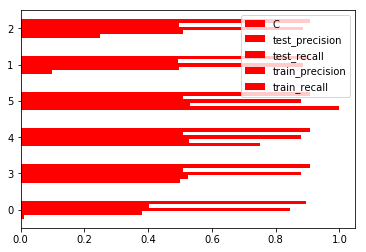

In [76]:
performance_df.sort_values('test_recall', axis=0, ascending=True).plot(kind='barh', color='r', )

## 5.2 Run a program without class weight = balanced.

In [79]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score

omitted_attributes = ["ID", "Personal Loan", "ZIP Code"]
    
X = bank_data.drop(omitted_attributes, axis=1)     # Predictor feature columns (8 X m)
    
# Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)
Y = bank_data['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

# Split the data into training and test set in the ratio of 70:30 respectively
C = [0.01, 0.1, 0.25, 0.5, 0.75, 1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

model_performance = []

for i in C:
    # Fit the model on train data
    model = LogisticRegression(
            random_state=2,
            penalty='l1', 
            solver='liblinear', 
            C=i)  # changing values of C
    
    model.fit(x_train, y_train)
    
    # predict on test data
    y_predict = model.predict(x_test)  
    test_recall = round(recall_score(y_test, y_predict),3)
    test_precision = round(precision_score(y_test, y_predict),3)
    
    # predict on train data    
    y_predict = model.predict(x_train)     
    train_recall = round(recall_score(y_train, y_predict),3)
    train_precision = round(precision_score(y_train, y_predict),3)
    
    model_performance.append({'C':i, 'test_recall':  test_recall, 'test_precision': test_precision, 'train_recall':  train_recall, 'train_precision': train_precision})
        
performance_df = pd.DataFrame.from_dict(model_performance)
print(performance_df)

      C  test_precision  test_recall  train_precision  train_recall
0  0.01           0.584        0.302            0.542         0.293
1  0.10           0.890        0.544            0.852         0.592
2  0.25           0.897        0.584            0.866         0.647
3  0.50           0.912        0.624            0.856         0.665
4  0.75           0.914        0.644            0.865         0.659
5  1.00           0.907        0.651            0.865         0.656


## 5.3 Look for high income customers
We are able to improve the precision of the model by looking for customers with more than 100k income. Our chances for prediction mistake for customers without intention to buy personal loans are lower significantly because of high precision value of 0.865.

% of customers earning above 100k is 1212
      C  test_precision  test_recall  train_precision  train_recall
0  0.01           0.782        0.804            0.780         0.837
1  0.10           0.785        0.819            0.801         0.873
2  0.25           0.780        0.848            0.809         0.877
3  0.50           0.793        0.862            0.816         0.870
4  0.75           0.788        0.862            0.816         0.870
5  1.00           0.793        0.862            0.807         0.877
          0         1         2         3         4         5         6  \
0 -0.210524  0.214854  0.031312  1.170147  2.196414  0.000697 -1.090667   

          7         8         9  
0  3.184089 -0.399199 -0.805311  


C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


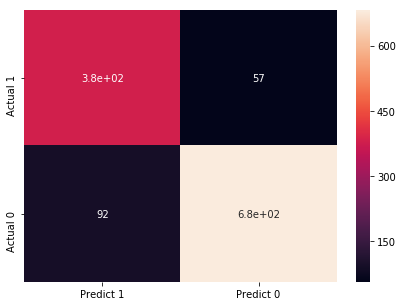

In [125]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score

omitted_attributes = ["ID", "Personal Loan", "ZIP Code", 'CCAvg']
       
bank_data_exceed_hundred_k = bank_data[bank_data['Income']>100] 
print(f"% of customers earning above 100k is {bank_data_exceed_hundred_k.shape[0]}")

X = bank_data_exceed_hundred_k.drop(omitted_attributes, axis=1)     # Predictor feature columns (8 X m)
    
# Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)
Y = bank_data_exceed_hundred_k['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

# Split the data into training and test set in the ratio of 70:30 respectively
C = [0.01, 0.1, 0.25, 0.5, 0.75, 1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

model_performance = []

for i in C:
    # Fit the model on train data
    model = LogisticRegression(
            random_state=2,
            penalty='l1', 
            solver='liblinear', 
            class_weight='balanced', 
            C=i)  # changing values of C
    
    model.fit(x_train, y_train)
    
    # predict on test data
    y_predict = model.predict(x_test)  
    test_recall = round(recall_score(y_test, y_predict),3)
    test_precision = round(precision_score(y_test, y_predict),3)
    
    # predict on train data    
    y_predict = model.predict(x_train)     
    train_recall = round(recall_score(y_train, y_predict),3)
    train_precision = round(precision_score(y_train, y_predict),3)
    
    model_performance.append({'C':i, 'test_recall':  test_recall, 'test_precision': test_precision, 'train_recall':  train_recall, 'train_precision': train_precision})
        
performance_df = pd.DataFrame.from_dict(model_performance)
print(performance_df)

model = LogisticRegression(
random_state=42,
penalty='l1', 
solver='liblinear', 
class_weight='balanced', 
C=0.75)  # changing values of C
    
model.fit(x_train, y_train)
    
# predict on test data
y_predict = model.predict(X)

cm=metrics.confusion_matrix(Y, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [128]:
print(pd.DataFrame(model.coef_))
X.head()

          0         1         2         3         4         5      6  \
0 -0.260778  0.264394  0.030359  1.149313  2.177864  0.000717 -0.988   

          7         8         9  
0  3.038223 -0.366899 -0.759485  


,Age,Experience,Income,Family,Education,Mortgage,Securities Account_1,CD Account_1,Online_1,CreditCard_1
9,34,9,180,1,3,0,0,0,0,0
10,65,39,105,4,3,0,0,0,0,0
12,48,23,114,2,3,0,1,0,0,0
14,67,41,112,1,1,0,1,0,0,0
16,38,14,130,4,3,134,0,0,0,0


## 5.3 High mistakes for lower income customers

% of customers earning below 100k is 75.56%


C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


      C  test_precision  test_recall  train_precision  train_recall
0  0.01           0.045        0.867            0.036         0.885
1  0.10           0.053        0.933            0.036         0.846
2  0.25           0.056        0.933            0.039         0.885
3  0.50           0.057        0.933            0.040         0.885
4  0.75           0.057        0.933            0.040         0.885
5  1.00           0.057        0.933            0.040         0.885


C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


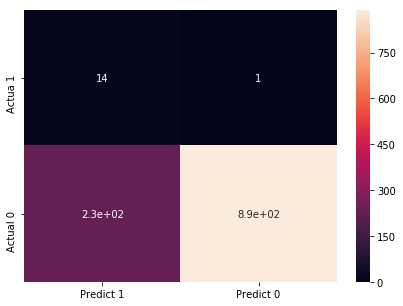

In [129]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score

omitted_attributes = ["ID", "Personal Loan", "ZIP Code", 'CCAvg']
       
bank_data_below_hundred_k = bank_data[bank_data['Income']<100] 
print(f"% of customers earning below 100k is {bank_data_below_hundred_k.shape[0]/bank_data.shape[0]*100}%")

X = bank_data_below_hundred_k.drop(omitted_attributes, axis=1)     # Predictor feature columns (8 X m)
    
# Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)
Y = bank_data_below_hundred_k['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

# Split the data into training and test set in the ratio of 70:30 respectively
C = [0.01, 0.1, 0.25, 0.5, 0.75, 1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

model_performance = []

for i in C:
    # Fit the model on train data
    model = LogisticRegression(
            random_state=5,
            penalty='l1', 
            solver='liblinear', 
            class_weight='balanced', 
            C=i)  # changing values of C
    
    model.fit(x_train, y_train)
    
    # predict on test data
    y_predict = model.predict(x_test)  
    test_recall = round(recall_score(y_test, y_predict),3)
    test_precision = round(precision_score(y_test, y_predict),3)
    
    # predict on train data    
    y_predict = model.predict(x_train)     
    train_recall = round(recall_score(y_train, y_predict),3)
    train_precision = round(precision_score(y_train, y_predict),3)
    
    model_performance.append({'C':i, 'test_recall':  test_recall, 'test_precision': test_precision, 'train_recall':  train_recall, 'train_precision': train_precision})
        
performance_df = pd.DataFrame.from_dict(model_performance)
print(performance_df)

model = LogisticRegression(
random_state=42,
penalty='l1', 
solver='liblinear', 
class_weight='balanced', 
C=0.75)  # changing values of C
    
model.fit(x_train, y_train)
    
# predict on test data
y_predict = model.predict(x_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actua 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

# 6.  Business understanding of the model

We can divide the customers into two to three groups depending on sales resources constraints in the Bank. 

## 6.1 Customers earning exceeding 100K

For the figure below, we could learn from the model with high accuracy exceeding 80% for customers who would sign up personal loan. Using the print(pd.DataFrame(model.coef_)), we could identify the coefficient of the attributes and identify customers who are within the attribute values but have not signup a personal loan.

In [112]:
bank_data_exceed_hundred_k = bank_data[bank_data.Income>100] 
generate_percentage_count = lambda x : pd.Series.value_counts(x)
generate_categorical_values(bank_data_exceed_hundred_k, ["Personal Loan", "Securities Account", "CD Account", "Online", "CreditCard"]).apply(generate_percentage_count)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,774,1085,1053,486,855
1,438,127,159,726,357


## 6.2 Customers earning below 100K

For the figure below, we could learn from the model with low accuracy of 5% for customers who would sign up personal loan. Using the print(pd.DataFrame(model.coef_)), we could identify the coefficient of the attributes and identify customers who are within the attribute values but have not signup a personal loan.

The potential for customers without personal loans are for customers with income below 100K.

In [131]:
bank_data_exceed_hundred_k = bank_data[bank_data.Income<100] 
generate_percentage_count = lambda x : pd.Series.value_counts(x)
generate_categorical_values(bank_data_exceed_hundred_k, ["Personal Loan", "Securities Account", "CD Account", "Online", "CreditCard"]).apply(generate_percentage_count)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,3737,3383,3635,1525,2667
1,41,395,143,2253,1111
